机器学习在安全领域应用存在的几个难点：

1. 传统基于监督式的学习，需要大量的标注数据，安全领域的样本数据集偏偏就缺，而且特别缺；
2. 有大量的正样本（公司内，或合作），但是负样本极少，面对监督式学习如何学？学习结果可能而知误差太大；
3. 安全领域对专业知识的要求，也更是强于其他领域，这也在某种程度阻碍了机器学习的应用，特别是特征的提取，都需要专业的知识，才能有好的预期；
4. 安全领域是严重攻防不对等的环境，对于机器学习的应用也带来困扰，变化多端，刚建好基于现有情况的特征和模型，可能在下一秒（有点夸张）就几乎失去效用了；
5. 另外一个为大家所诟病的就是大部分情况使用机器算法得到的预测结果并不如预期，这也是大家不敢用的原因，持张望态度的多；

但是，即使存在种种困难和问题，机器学习在安全领域的研究还在继续，且愈演愈烈，大家还是存在很高的期望的，未来，肯定是要求有一个攻防对抗自动化的能力的，这是安全这一领域的特殊性所决定的，而且是必然的要求。

监督式学习和传统规则集的方法相当于是黑名单的方法，这种方法灵活性较差，需要不断维护规则集，和提取异常访问的特征，但是误报率较低；而监督式学习以不符合正常访问的被视为异常访问，相当于白名单，这种情况误报率可能较高，类似于病毒查杀里的误差，但是可控制较强。两种方法可以作为强势互补，共同抵御威胁。

正常模型建立方法：

如何对正常访问的特征进行数值提取，我们需要研究正常特征的特性！

1. 基于统计学习模型

基于统计学习的web异常检测，通常需要对正常流量进行数值化的特征提取和分析。特征例如，URL参数个数、参数值长度的均值和方差、参数字符分布、URL的访问频率等等。接着，通过对大量样本进行分布统计，建立数学模型，进而通过统计学方法进行一场检测。

2. 基于文本分析的机器学习模型

web异常检测归根结底还是基于日志文本的分析，因而可以借鉴NLP中的一些方法思路，进行文本分析建模。这其中，比较成功的基于隐马尔可夫模型的参数值异常检测。

3. 基于单分类模型

由于web入侵黑样本稀少，传统监督学习方法难以训练。基于白样本的异常检测，可以通过非监督式或单分类模型进行样本学习，构造能够充分表达白样本的最小模型，实现异常检测。

4. 基于聚类模型

通常正常浏览是大量重复性存在的，而入侵行为则极为稀少。因此，通过web访问的聚类分析，可以识别大量正常行为之外，小挫的异常行为，进行入侵发现。

基于统计学习模型

基于统计学习模型的方法，首先对数据建立特征集，然后对每个特征进行统计建模。对于测试样本，首先计算**每个特征的异常程度**，再通过模型对异常值进行融合打分，作为最早异常检测判断依据。

特征1：参数值value长度

模型：长度值分布，均值$\mu$，方差$\sigma^2$，利用切比雪夫不等式计算异常值$p$

切比雪夫不等式（类比于3$\sigma$）：$Pr\bigr(|X - \mu| \ge k\sigma\bigr) \le \frac{1}{k^2}$

意义：任意一个数据集中，位于其平均数$k$个标准差范围内的比例总是少于$1 - \frac{1}{k^2}$，即有公式（上式扩展）：

$$Pr\bigr(\mu - k\sigma < X < \mu + k\sigma\bigr) \le 1 - \frac{1}{k^2}$$。

该不等式直白地可理解为，对于一随机变量，与平均值相差$k$个标准差的概率不多于$\frac{1}{k^2}$，也就是因该随机变量符合正太分布，在每个相差$k$个标准差的范围内的数据个数是满足一定规律的。

基于切比雪夫不等式的提取异常值的假设是基于正常访问的数据是集中在平均值附近的，而异常访问是远离平均值的。我们可以针对每个随机变量的长度值按照正太分布求得可能是异常访问的value长度，既然可以认定为是负类。

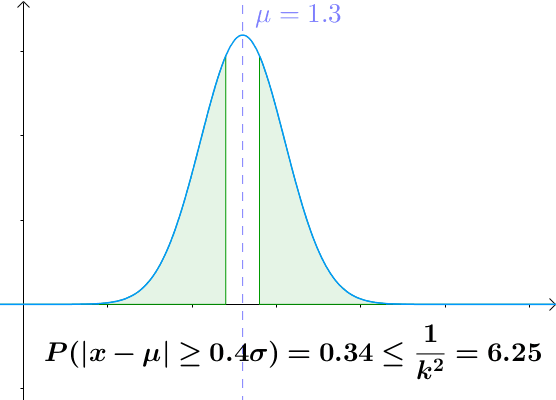

参考：

https://zh.wikipedia.org/wiki/%E5%88%87%E6%AF%94%E9%9B%AA%E5%A4%AB%E4%B8%8D%E7%AD%89%E5%BC%8F
https://www.zhihu.com/question/27821324

特征2：字符分布

模型：对字符分布建立模型，通过卡方检验计算异常值$p$

卡方检验：$\mathcal{x}^2 = \sum_{i=1}^n\frac{\bigr(O_i - E_i\bigr)^2}{E_i} = N\sum_{i=1}^n\frac{\bigr(\frac{O_i}{N} - p_i\bigr)}{p_i}$

意义：测试观测值的频率分布是否符合理论分布

卡方检测：是用于衡量两事物之间相关性，如果两事物之间相互独立，其实际值与理论值就很相近，差别很小，而相关，则说明理论值会受到这个相关性的影响，找到偏差，只于偏差的多少，就是用卡方检验来衡量，卡方值越大，说明关联越多，或者说两随机变量越相近，在特征提取时，就越需要保留；而在此处卡方值越小的，则说明与其它的独立程度越多，也就越可能是异常访问。

χ2检验（chi-square test）或称卡方检验，是一种用途较广的假设检验方法，主要是比较两个及两个以上样本率( 构成比）以及两个分类变量的关联性分析。其根本思想就是在于比较理论频数和实际频数的吻合程度或拟合优度问题。在文本分类中可以用卡方值做特征选择（降维），也可以用卡方检验做异常用户的检测。

参考：
https://blog.csdn.net/bitcarmanlee/article/details/52279907
https://plushunter.github.io/2017/06/10/%E6%95%B0%E6%8D%AE%E5%88%86%E6%9E%90%E7%B3%BB%E5%88%97%EF%BC%882%EF%BC%89%EF%BC%9A%E5%8D%A1%E6%96%B9%E6%A3%80%E9%AA%8C/

特征3：参数缺失

模型：建立参数表，通过查表检测参数错误或缺失

特征4：参数顺序

模型：参数顺序有向图，判断是否有违规顺序关系

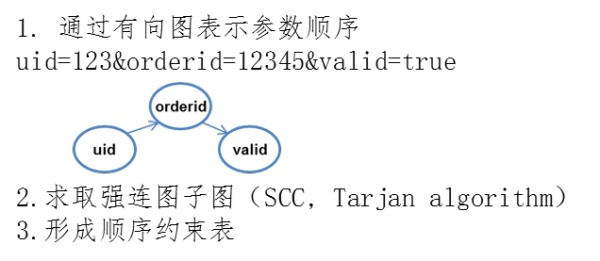

特征5：访问频率（单ip的访问频率，总访问频率）

模型：时段内访问频率分布，均值$\mu$，方差$\sigma^2$，利用切比雪夫不等式计算异常值$p$

特征6：访问时间间隔

模型：间隔时间分布，通过卡方检验计算异常值$p$

注意：区分切比雪夫和卡方检测的适用条件，前者是用于对单个随机变量中的异常值计算，后者是两个以上随机变量的理论与期望的检验。

最终，通过异常打分模型将多个特征异常值融合，得到最终异常打分：

$$\sum_mw_m \times (1-p_m)$$

斯皮尔曼、卡方检验和互信息比较：

* 斯皮尔曼：主要是衡量两线性变量之间的相关度，不适用于非线性关系的衡量
* 卡方检验：衡量两随机变量间的独立性假设，或相关性，独立性假设错误，即相关性假设成立
* 互信息：衡量两随机变量间的相互依赖性

> 总结：本文主要介绍了线性相关系数、卡方检验、互信息三个概念。 
1.  线性相关系数，基于两个变量在线性的基础上，主要用来衡量两个变量的线性相关的程度，其它类型的相关性Pｅａｒｓｏｎ相 关 系 数就无法衡量了。 
2. 卡方检验基于两个样本会遵守特定的理论分配，用来检验两个样本or变量是否独立。计算也相对比较简单。能做大小比较，但是如果判断自变量与因变量是否相关，需要查卡方临界表。 
3. 互信息基于信息熵理论，可以作为变量间相互依赖性的量度，涉及log计算，计算稍微复杂些。后面两个方法都只能计算离散特征，如果是连续特征，需要先将特征离散化之后再进行计算。 
4. 特征选择时：卡方检验，偏向于选择出现次数较少的特征。因为是期望-观测值的平方再除以期望，互信息不会出现这个情况。因为互信息有乘以p(x,y)p(x,y)p(x,y)。从大多数实验来看，卡方跟互信息效果差不多，看具体的数据集而定。
5. 本文来自 gdanskamir 的CSDN 博客 ，全文地址请点击：https://blog.csdn.net/gdanskamir/article/details/54913233?utm_source=copy 

基于文本分析的机器学习模型

URL参数输入的背后，是后台代码的解析，通常来说，每个参数的取值都有一个范围，其允许的输入也具有一定模式。如：

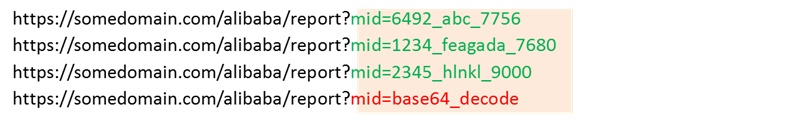

例子汇总，绿色代表正常流量，红色代表异常流量。由于异常流量和正常流量杂参数、取值长度、字符分布上都很相似，基于上述特征统计的方法很难识别。进一步看，正常浏览尽管每个都不相同，但有共同的模式，而异常流量并不符合。在这个例子中，符合取值的样本模式为：数字_字母_数字，我们可以用一个状态机来表达合法的取值范围：

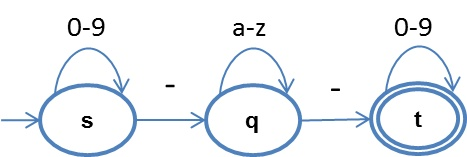

对文本序列模式的建模，相比较数值特征而言，更加准确可靠。其中，比较成功的应用时基于隐马尔可夫模型的序列建模。

基于HMM的状态序列建模，首先将原始数据转化为状态表示，比如数字用N表示状态，字母用a表示状态，其它字符保持不变。这一步也可以看做是原始数据的归一化，其结果使得原始数据的状态空间被有效压缩，正常样本间的差距也进一步减小。

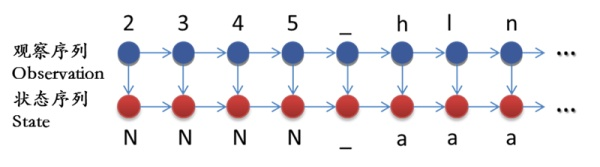

紧接着，对于每个状态，统计之后一个状态的概率分布。例如，下图就是一个可能得到的结果。"^"代表开始符号，由于白样本中都是数字开头，其实符号（状态^）转移到数字（状态N）的概率是1；接下来，数字（状态N）的下一个状态，有0.8的概率还是数字（状态N），有0.1的概率转移到下划线，有0.1的概率转移到结束符（状态$），以此类推。

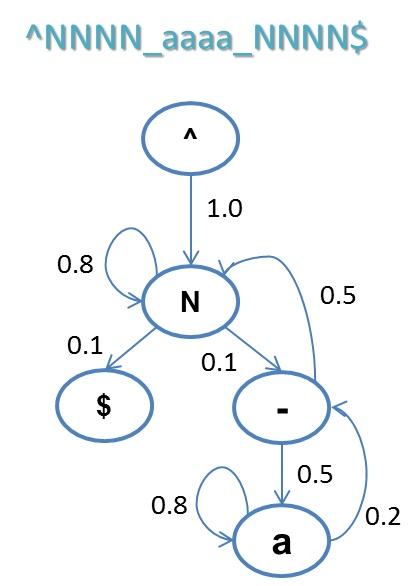

利用这个状态转移模型，我们就可以判断一个输入序列是否符合白样本的欧式：

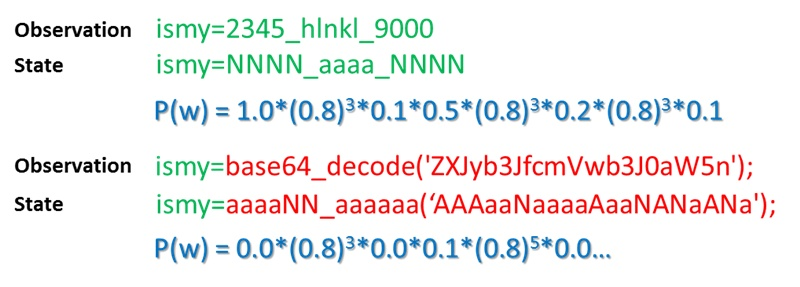

正常样本的状态序列出现概率要高于异常样本，通过合适的阈值就可以进行异常识别（这也是基于正样本数明显要大于负样本这样一个事实）

基于以上思路，我想到了也可以用朴素贝叶斯来检测。

基于单分类模型

在二分类问题上，由于我么只有大量白样本，可以考虑通过单分类模型，学习单样本的最小边界，边界之外的则识别为异常。

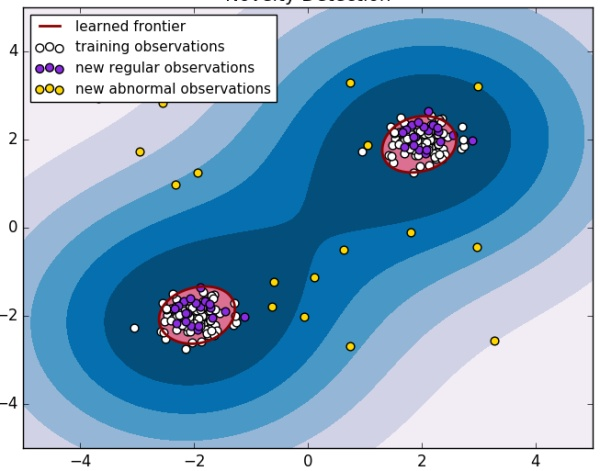

这类方法中，比较成功的应用时单类支持向量（one-class SVM）。这里简单介绍该类方法的一个成功案例McPAD的思路。

McPAD系统首先通过N-gram将文本数据向量化，对于下面的例子：

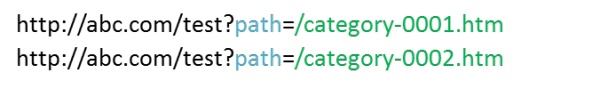

首先通过长度为N的滑动窗口将文本分割为N-gram序列，例子中，N取2，窗口滑动步长为1，可以得到如下N-gram序列。

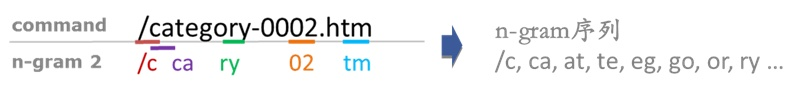

下一步要把N-gram序列转化成向量。假设共有256种不同的字符，那么会得到256 * 256种2-gram的组合（如aa，ab，ac，...）。我们可以用一个256 * 256长的向量，每一位one-hot的表示（有则置1，没有则置0）文本中是否出现了该2-gram。由此得到一个256 * 256的0/1向量。进一步，对于每个出现的2-gram，我们用这个2-gram在文本中出现的频率来替代单调的“1”，以表示更多的信息：

$$f(\beta \mid B) = \frac{\text{# of occurrences of} \hspace{0.1cm} \beta \hspace{0.1cm} \text{in B}}{l -n + 1}$$

至此，每个文本都可以通过一个256 * 256长的向量表示。

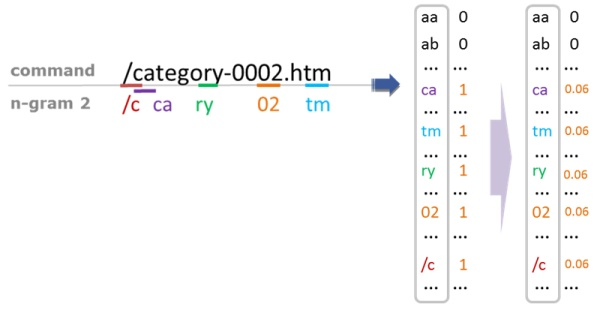

> 说明：该方法其实就是bow的tf版本。

现在我们得到了训练样本的256 * 256向量集，现在需要通过单分类SVM去找到最小边界。然而问题在于，样本的维度太高，会对训练造成困难。我们还需要再解决一个问题：如何缩减特征维度。特征维度约减有很多成熟的方法，McPAD系统中对特征进行了聚类达到降维目的。

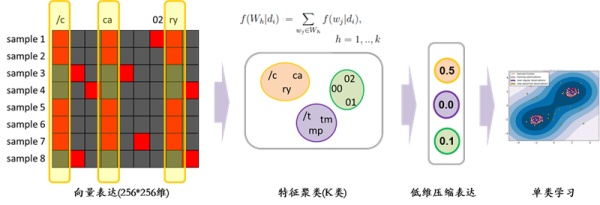

> 说明：有点类似混合高斯求最大后验概率。我们根据先验概率和其似然函数，对于每个输入向量x，得到其将每个聚类的后验概率，将这所有后验概率组合成新的向量，即为降维后的向量表达。

上左矩阵中黑色表示0，红色表示非0。矩阵的每一行，代表一个输入文本（sample）中具有哪些2-gram。如果换一个角度来看这个矩阵，则每一列代表一个2-gram有哪些sample中存在，由此，由此，每个2-gram也能通过sample的向量表达。从这个角度我们可以获得2-gram的相关性。对于2-gram的向量进行聚类，指定的类别数K即为约减后的特征维数。约减后的特征向量，再投入单类SVM进行进一步模型训练。

再进一步，McPAD采用线性特征约减加单单分类SVM的方法解决白模型训练的过程，其实也可以被深度学习中的深度自编码模型替代，进行非线性特征约减。同时，自编码模型的训练过程本身就是学习训练样本的压缩表达，通过给定输入的重建误差，就可以判断输入样本是否与模型相符。

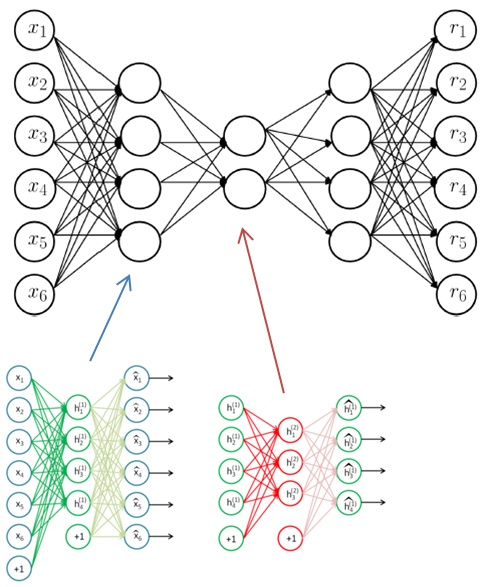

我们还是沿用McPAD通过2-gram实现文本向量化的方法，直接将项链输入到深度自编码模型，进行训练。测试阶段，通过计算重建误差作为一场检测的标准。(因为是非监督式的训练，测试阶段只能通过训练阶段的最小重构误差得到的模型用于测试并分类)

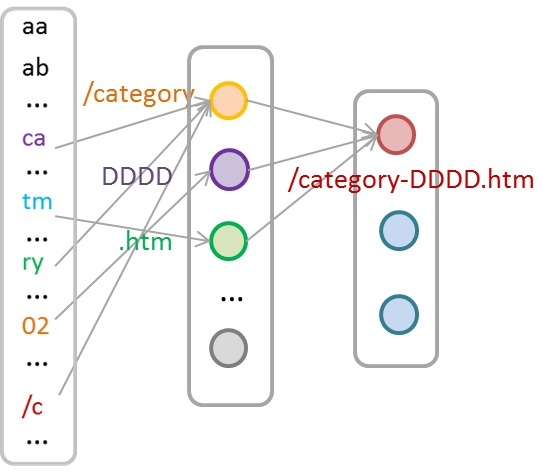

基于这样的框架，一场检测的基本流程如下：

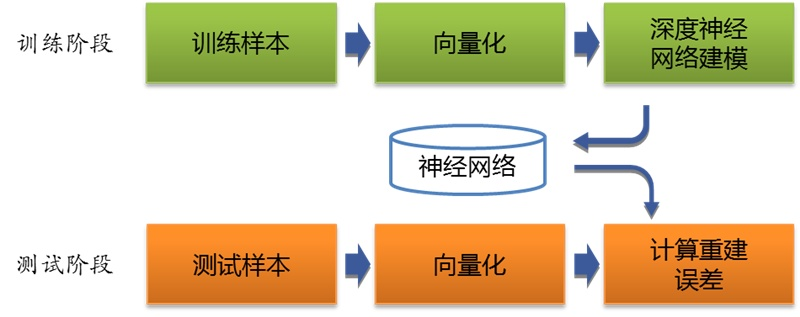

本文管中窥豹地介绍了机器学习用于web异常检测的几个思路。web流量异常检测只是web入侵检测的一环，用于从海量日志中捞出少量的"可疑"行为，但是这个"少量"还是存在大量误报，只能用于检测，还远远不能直接用于WAF直接拦截。一个完备的web入侵检测系统，还需要在此基础上进行入侵行为识别，以及告警误报等环节。

无论是数据分析，数据挖掘，还是机器学习等，第一我们需要明确目标，找准方向，我们要做什么？弄清楚我们要做什么之后。就是该如何做的事情，根据打交道，固然需要找到完成我们的目标所需要的数据，一般在公司里，我们的数据在哪里？其实，大部分情况我们并不是向外探索，在企业内部就可以找到，大部分情况都是混在业务数据中，需要自己去过滤出来。有了数据之后，我们需要建立一套完整的应对数据的生命周期解决方案，从数据诞生、采集、传输、清洗、存储、计算、交互...直至数据消亡，关注这整个过程数据的状态。

对于数据分析，机器学习来说，固然好的数据质量，必然能够得到好的结果，特别对于统计分析和机器学习来说，都是依赖特征存活的，就更加如此了。

既然是威胁感知，对数据交互的重要性可想而知，需要实时知道情报，而不是等好久才有结果，那已经失去感知的意义了。交互不同于搜索，搜索只是展示、呈现，交互至少要聊天级别。好的交互能够提供给情报人员正确有价值的信息。

被动威胁感知使我们能够看得见威胁。

正常基本相似，异常各有不同，就如“不如意事常八九，可与语人无二三”。

机器学习模型存在的问题有衰减期，也就是说我们需要不断维护模型，对于情报感知，就更加如此，需要迭代训练或重训练。

威胁首先一定是一个异常，异常却不一定是一个威胁，所以在异常模型的基础上，还需要威胁模型。

单层模型输出单层浅层的线索，当不断的实现各种单层模型后，就可以通过一层层搭积木一样来组合各个模型，使众多不同层次的浅层线索能串起来形成较深层的线索。不存在一个万能模型能三头六臂覆盖掉所有场景，也不要指望一个完美模型就能直接产生深层线索。

web检测基于正常模式都相似，异常模式各有不同，只要针对正常模式建模，不符合正常模式的即为异常。使用HMM建模时，需要考虑到所有注入点的可能，如web中的GET\POST\COOKIE\HTTP HEADER都有可能存在异常的参数，然后还需要对所有正常的参数建模。